___


# Plotly y Cufflinks

* Plotly es una librería que permite crear gráficos interactivos que se pueden usar en dashboards o sitios web (se pueden guardar como archivos html o imágenes estáticas). Ver: https://plot.ly/python/
* Cufflinks conecta a Plotly con Pandas. Ver: https://github.com/santosjorge/cufflinks

## Introducción

### Creación de cuenta

1. Ir a **https://plot.ly/python/**
2. Click en **"Sign up"** para crear una nueva cuenta.
3. Diligenciar los datos del formulario para crear la cuenta.
4. Una vez se haya creado la cuenta, deben ingesar con su nombre de usuario y contraseña.
5. Ir a la configuración **"settings"** y seleccionar la opción **"API Keys"**.
6. Click en el botón **"Regenerate Key"**
7. Copiar la llave generada. Será utilizada más adelante en el notebook.


### Instalación

Es necesario instalar plotly y cufflinks para crear gráficos directamente desde los DataFrames de Pandas. 
Instale las librerías desde su línea de comandos usando:

    pip install plotly==3.9.0
    pip install cufflinks==0.15

In [1]:
#!pip install plotly==3.7.1
#!pip install cufflinks==0.14.6

!pip install plotly==3.9.0
!pip install cufflinks==0.15

     |████████████████████████████████| 41.2MB 1.6MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1
     |████████████████████████████████| 81kB 3.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/7f/d3/7d3146a1551614bf0b8eb631ac724d044dd341679e763b594b
Successfully built cufflinks
  Found existing installation: cufflinks 0.14.6
    Uninstalling cufflinks-0.14.6:
      Successfully uninstalled cufflinks-0.14.6


### Importar y configurar

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [15]:
import cufflinks as cf
print(cf.__version__)

0.15


In [16]:
cf.set_config_file(offline=True)

In [0]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [18]:
init_notebook_mode(connected=True)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Datos de ejemplo

In [0]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [21]:
df.head()

,A,B,C,D
0,0.376346,-0.601648,0.920582,0.732828
1,-0.137349,0.133423,0.936518,1.301916
2,-1.573265,-0.534847,-1.184252,-0.062660
3,-0.404992,-1.647620,1.939291,-0.669386
4,0.734834,-0.582249,-1.177558,-0.092223


In [0]:
df2 = pd.DataFrame({'Categoría':['A','B','C'],'Valor':[32,43,50]})

In [23]:
df2.head()

,Categoría,Valor
0,A,32
1,B,43
2,C,50


**Usando el método plot de Pandas, que usa matplotlib por debajo**

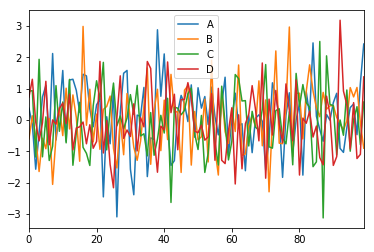

In [24]:
df.plot()

**Usando iplot() - Imagen interactiva de Plotly**

In [27]:
configure_plotly_browser_state()
df.iplot()

### Definir dimensiones de la Figura

In [28]:
configure_plotly_browser_state()
df[['B','D']].iplot(dimensions=(1000,500))

## Usando Plotly+Cufflinks 

* scatter
* bar
* box
* 3D surface
* histogram
* spread
* bubble
* heatmap
* scatter_matrix


### Scatter

In [29]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers') 

In [30]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=5)

In [31]:
df_C_normalizado=(df['C']-df['C'].min())/(df['C'].max()-df['C'].min())
df_C_normalizado

0     0.718169
1     0.720994
2     0.345047
3     0.898754
4     0.346234
5     0.572388
6     0.325542
7     0.406496
8     0.749664
9     0.490795
10    0.657003
11    0.425466
12    0.784997
13    0.298435
14    0.482499
15    0.655237
16    0.399706
17    0.365940
18    0.297237
19    0.635580
20    0.777220
21    0.671785
22    0.881496
23    0.385363
24    0.616540
25    0.764238
26    0.521735
27    0.577719
28    0.504977
29    0.566075
        ...   
70    0.869135
71    0.403019
72    0.395272
73    0.608391
74    0.618707
75    0.451761
76    0.419910
77    0.602012
78    0.301054
79    0.818923
80    0.630708
81    0.755686
82    0.653342
83    0.626881
84    0.290403
85    0.317844
86    1.000000
87    0.000000
88    0.918410
89    0.643700
90    0.636088
91    0.356439
92    0.554958
93    0.468436
94    0.725021
95    0.378096
96    0.557681
97    0.630370
98    0.415180
99    0.656866
Name: C, Length: 100, dtype: float64

In [32]:
configure_plotly_browser_state()
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=df_C_normalizado*40)

### Bar 

In [33]:
df2

,Categoría,Valor
0,A,32
1,B,43
2,C,50


In [34]:
configure_plotly_browser_state()
df2.iplot(kind='bar',x='Categoría',y='Valor')

In [35]:
df.head()

,A,B,C,D
0,0.376346,-0.601648,0.920582,0.732828
1,-0.137349,0.133423,0.936518,1.301916
2,-1.573265,-0.534847,-1.184252,-0.062660
3,-0.404992,-1.647620,1.939291,-0.669386
4,0.734834,-0.582249,-1.177558,-0.092223


In [36]:
df.sum()

A    11.742557
B     0.978750
C    -2.449690
D    -6.038099
dtype: float64

In [37]:
configure_plotly_browser_state()
df.sum().iplot(kind='bar')
#df.count().iplot(kind='bar')
#df[['A','C']].mean().iplot(kind='bar')

### Boxplots

In [38]:
configure_plotly_browser_state()
df.iplot(kind='box')

### Superficie 3D

In [39]:
configure_plotly_browser_state()
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

Ver más ejemplos: https://plot.ly/python/3d-surface-plots/

### Histogramas

In [40]:
configure_plotly_browser_state()
df['A'].iplot(kind='hist',bins=25)

In [41]:
configure_plotly_browser_state()
df.iplot(kind='hist')

### Bubble

El tamaño de los puntos depende de otra columna, en este caso, la columna C

In [42]:
configure_plotly_browser_state()
df.iplot(kind='bubble', x='A', y='B', size='D', colorscale='rdylbu')        

### Heatmap

Se requiere una matriz cuadrada.

In [43]:
df.corr()

,A,B,C,D
A,1.000000,0.129767,-0.059975,-0.103493
B,0.129767,1.000000,-0.077947,-0.050152
C,-0.059975,-0.077947,1.000000,0.057416
D,-0.103493,-0.050152,0.057416,1.000000


In [44]:
configure_plotly_browser_state()
df.corr().iplot(kind='heatmap',colorscale='spectral')

### scatter_matrix

Similar a pairplot() de Seaborn pero interactivo.

In [45]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [0]:
#df.scatter_matrix()
# Cufflinks v0.15 tiene un bug en este método. Se espera una solución pronto.

## Avanzado

Se puede exportar la figura Plotly en formato de texto (corresponde a un diccionario de Python):

In [48]:
configure_plotly_browser_state()
df['B'].iplot(asFigure=True)

Figure({
    'data': [{'line': {'color': 'rgba(255, 153, 51, 1.0)', 'dash': 'solid', 'shape': 'linear', 'width': 1.3},
              'mode': 'lines',
              'name': 'B',
              'text': '',
              'type': 'scatter',
              'uid': '38011859-0218-4eec-8500-ef516deb2b54',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                          54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
                          72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
                          90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
              'y': array([-0.60164828,  0.13342297, -0.53484717, -1.64762036, -0.58224875,
                          -0.91894192,  0.04977728, -2

Se puede capturar y modificar esa información. 

En este caso se captura toda la info del df y se modifica el nombre de la primera columna

In [49]:
configure_plotly_browser_state()
datos = df.to_iplot()
datos

[{'line': {'color': 'rgba(255, 153, 51, 1.0)',
   'dash': 'solid',
   'shape': 'linear',
   'width': 3},
  'mode': 'lines',
  'name': 'A',
  'type': 'scatter',
  'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  'y': array([ 3.76346453e-01, -1.37349483e-01, -1.57326495e+00, -4.04991660e-01,
          7.34833830e-01,  1.10157316e+00, -7.18201496e-01,  2.12499519e+00,
         -6.39426941e-01,  2.33738519e-01,  1.58225350e+00, -6.78772636e-01,
          1.27918402e+00,  1.30198105e+00,  9.47015792e-01,  2.47086011e-01,
          1.46206800e+00,  1.40992619e+00,  3.51875209e-01, -2.175

In [0]:
datos[0]['name']='PRIMERA COL'

In [51]:
configure_plotly_browser_state()
df.iplot(data=datos)

**Ver más ejemplos:**

* [Galería](http://nbviewer.ipython.org/gist/santosjorge/b278ce0ae2448f47c31d)
* [Pandas Like Visualization](http://nbviewer.ipython.org/gist/santosjorge/aba934a0d20023a136c2)
* [Basics](http://nbviewer.ipython.org/gist/santosjorge/f3b07b2be8094deea8c6)
* [Color Management](http://nbviewer.ipython.org/gist/santosjorge/00ca17b121fa2463e18b)
* [Offline Mode](http://nbviewer.ipython.org/gist/santosjorge/5fdbe947496faf7af5e6)

#### Referencias 
* https://stackoverflow.com/questions/35746074/cufflinks-for-plotly-setting-cufflinks-config-options-launches
* https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory